<a href="https://colab.research.google.com/github/RonitShetty/NLP-Labs/blob/main/C070_RonitShetty_NLP10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading data...
Data head:
                                                   review sentiment
33553  I really liked this Summerslam due to the look...  positive
9427   Not many television shows appeal to quite as m...  positive
199    The film quickly gets to a major chase scene w...  negative
12447  Jane Austen would definitely approve of this o...  positive
39489  Expectations were somewhat high for me when I ...  negative

Value counts:
 sentiment
positive    5039
negative    4961
Name: count, dtype: int64

Preprocessing text...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Sample processed review:
                                                   review  \
33553  I really liked this Summerslam due to the look...   
9427   Not many television shows appeal to quite as m...   
199    The film quickly gets to a major chase scene w...   
12447  Jane Austen would definitely approve of this o...   
39489  Expectations were somewhat high for me when I ...   

                                        processed_review  
33553  realli like summerslam due look arena curtain ...  
9427   mani televis show appeal quit mani differ kind...  
199    film quickli get major chase scene ever increa...  
12447  jane austen would definit approv one gwyneth p...  
39489  expect somewhat high went see movi thought ste...  

Vectorizing text...

Splitting data and training the model...
Model training complete.

Evaluating the model...
Accuracy: 0.8670

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      

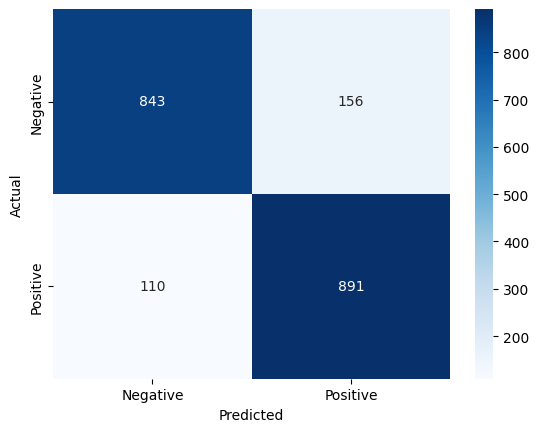


Testing with new reviews...
Review: 'This movie was absolutely fantastic! The acting was superb and the plot was thrilling.'
Predicted Sentiment: Positive 

Review: 'A complete waste of time. The plot was predictable and the acting was terrible.'
Predicted Sentiment: Negative


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Load and Inspect Data ---
print("Loading data...")
df = pd.read_csv('IMDB Dataset.csv')

# Let's work with a smaller sample for faster processing
df = df.sample(n=10000, random_state=42)

print("Data head:\n", df.head())
print("\nValue counts:\n", df['sentiment'].value_counts())

# --- 2. Text Preprocessing ---
print("\nPreprocessing text...")

# Download stopwords if you haven't already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = text.split()
    # Remove stop words and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Join words back to a single string
    return ' '.join(words)

# Apply the preprocessing function
df['processed_review'] = df['review'].apply(preprocess_text)
print("Sample processed review:\n", df[['review', 'processed_review']].head())


# --- 3. Feature Extraction (TF-IDF Vectorization) ---
print("\nVectorizing text...")
# TF-IDF turns text into numerical data based on word frequency and importance.
vectorizer = TfidfVectorizer(max_features=5000) # Use top 5000 features
X = vectorizer.fit_transform(df['processed_review']).toarray()

# Convert sentiment labels to binary (positive=1, negative=0)
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


# --- 4. Split Data and Train Model ---
print("\nSplitting data and training the model...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We'll use Logistic Regression, a simple and effective model for this task.
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model training complete.")


# --- 5. Evaluate the Model ---
print("\nEvaluating the model...")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix for better visualization
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# --- 6. Test with New Reviews ---
print("\nTesting with new reviews...")

def predict_sentiment(review):
    processed_review = preprocess_text(review)
    vectorized_review = vectorizer.transform([processed_review]).toarray()
    prediction = model.predict(vectorized_review)
    return 'Positive' if prediction[0] == 1 else 'Negative'

# Example tests
test_review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was thrilling."
test_review_2 = "A complete waste of time. The plot was predictable and the acting was terrible."

print(f"Review: '{test_review_1}'")
print(f"Predicted Sentiment: {predict_sentiment(test_review_1)} \n")

print(f"Review: '{test_review_2}'")
print(f"Predicted Sentiment: {predict_sentiment(test_review_2)}")